In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")

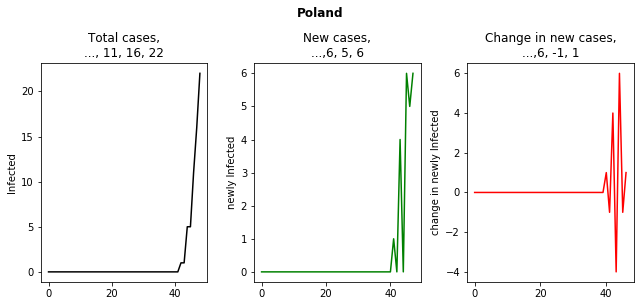

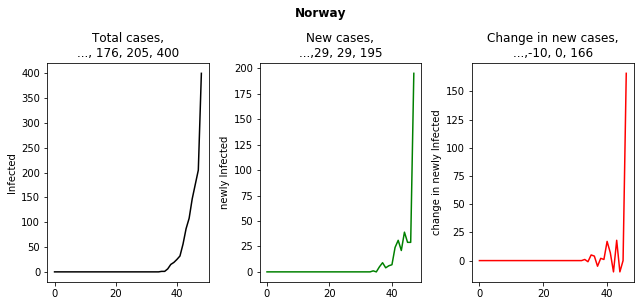

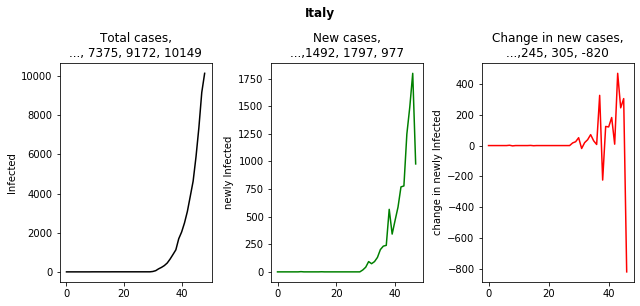

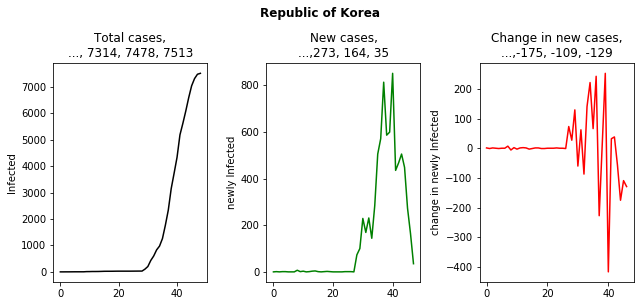

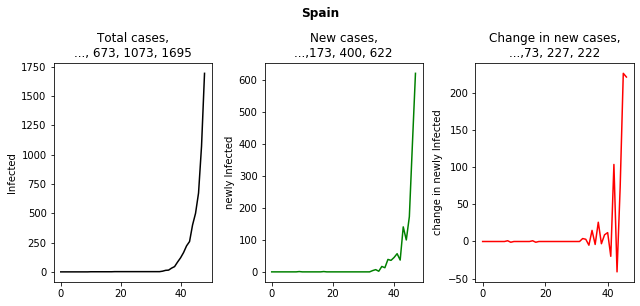

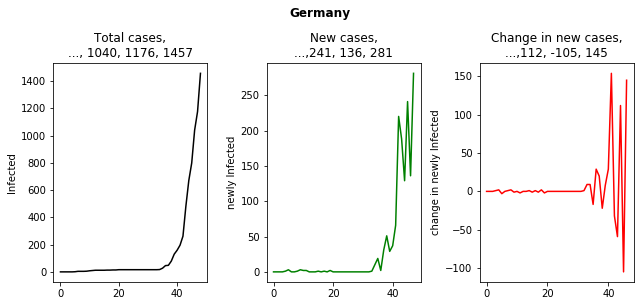

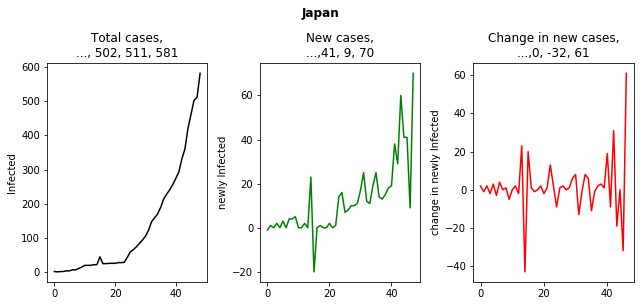

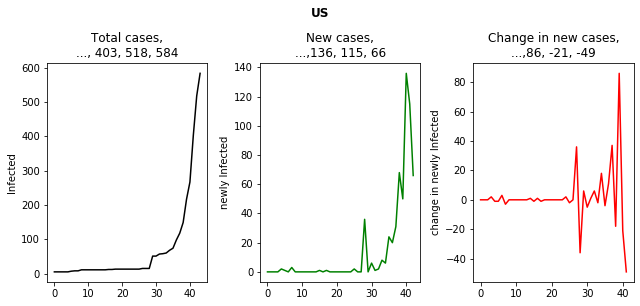

In [140]:
my_countries = ["Poland", "Norway", "Italy","Republic of Korea", "Spain", "Germany","Japan", "US"]

for country in my_countries:
    df_temp = df[df['Country/Region'] == country]
    df_temp = df_temp.to_numpy()
    
    if country == "US":
        
        df_temp = np.sum(df_temp[:,4:-1],axis=0)
        df_temp = df_temp[np.newaxis,:]
        
        
    fig, axs = plt.subplots(1, 3, figsize=(9, 4))

    plt.suptitle(f'{country}\n', y=1.05, weight="bold")  
    axs[0].set_title(f"Total cases,\n..., {df_temp[0,-3]}, {df_temp[0,-2]}, {df_temp[0,-1]}")
    axs[0].set_ylabel(f"Infected")
    axs[0].plot(df_temp[0,4:],c="black")
    
    
    
    axs[1].set_title(f"New cases,\n...,{np.diff(df_temp[0,4:],1)[-3]}, {np.diff(df_temp[0,4:],1)[-2]}, {np.diff(df_temp[0,4:],1)[-1]}")
    axs[1].set_ylabel("newly Infected")
    axs[1].plot(np.diff(df_temp[0,4:],1),c="green")
    
    
    
    axs[2].set_title(f"Change in new cases,\n...,{np.diff(df_temp[0,4:],2)[-3]}, {np.diff(df_temp[0,4:],2)[-2]}, {np.diff(df_temp[0,4:],2)[-1]}")
    axs[2].set_ylabel("change in newly Infected")
    axs[2].plot(np.diff(df_temp[0,4:],2), c="red")
    plt.tight_layout()
    plt.show()

In [138]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,413,414,414,418,418,422,426,428,428,429
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,102,119,120,124,124,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,"Dane, WI",US,43.0186,-89.5498,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
343,"Pierce, WI",US,44.7509,-92.3814,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
344,"Cuyahoga, OH",US,41.4339,-81.6758,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
345,"Weber, UT",US,41.2603,-111.9522,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
